In [1]:
import numpy as np
import util
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

/Users/laurazhang/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
trainfile = 'data/train.csv'
header, ids, X, Y = util.fetch_data(trainfile)

seed = 229
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


# Basic Classifier
with data split into training and dev sets

In [5]:
xgb = XGBClassifier(objective='binary:logistic', max_depth=7, learning_rate=0.1)
#xgbreg = XGBRegressor(objective='binary:logistic', max_depth=7, learning_rate=0.1)

xgb.fit(X_train, y_train)
#xgbreg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [6]:
# gini score for training data
print(util.gini_normalized(y_train, xgb.predict_proba(X_train)[:, 1]))
#print(util.gini_normalized(y_train, xgbreg.predict(X_train)))

0.508186463103


In [7]:
# gini score for dev data
print(util.gini_normalized(y_test, xgb.predict_proba(X_test)[:, 1]))
#print(util.gini_normalized(y_test, xgbreg.predict(X_test)))

0.26292832966


In [8]:
xgb.fit(X, Y) # retrain with all of data
util.make_prediction(xgb, 'data/test.csv', 'predictions/xgboost.csv', lambda X_test: 
                     xgb.predict_proba(X_test)[:,1])

In [9]:
trainsizes, traingini, testgini = util.learning_curves(xgb, X_train, X_test, y_train, y_test)


Evaluating model on training set size 23808
Evaluating model on training set size 47616
Evaluating model on training set size 71425
Evaluating model on training set size 95233
Evaluating model on training set size 119042
Evaluating model on training set size 142850
Evaluating model on training set size 166659
Evaluating model on training set size 190467
Evaluating model on training set size 214276
Evaluating model on training set size 238084
Evaluating model on training set size 261892
Evaluating model on training set size 285701
Evaluating model on training set size 309509
Evaluating model on training set size 333318
Evaluating model on training set size 357126
Evaluating model on training set size 380935
Evaluating model on training set size 404743
Evaluating model on training set size 428552
Evaluating model on training set size 452360
Evaluating model on training set size 476169
[0.97062755402934675, 0.89175429731473299, 0.83880787831057091, 0.802256090123457, 0.74856552179470404, 

NameError: name 'plt' is not defined

In [11]:
import matplotlib.pyplot as plt
print(traingini)
print('')
print(testgini)
plt.figure()
plt.plot(trainsizes, traingini, label='train gini')
plt.plot(trainsizes, testgini, label='test gini')
plt.xlabel('Training set size')
plt.ylabel('Normalized Gini coefficient')
plt.title('XGBoost')
plt.legend()
plt.savefig('figures/learning_curves/xgboost.eps', format='eps', dpi=1000)

[0.97062755402934675, 0.89175429731473299, 0.83880787831057091, 0.802256090123457, 0.74856552179470404, 0.72685531629292466, 0.69008621246450785, 0.66961175737949052, 0.6379174711475224, 0.63354214431965783, 0.61227786978908449, 0.59684514354280116, 0.58431358079422813, 0.56657351486797536, 0.55446247919325986, 0.54233771025313238, 0.53359897054582539, 0.53960529708199156, 0.5180625366471161, 0.50818646310261817]

[0.12826925985109833, 0.17417917764649021, 0.18911113379374289, 0.19971428939964461, 0.21909324137617348, 0.23167726952828385, 0.23765521306461632, 0.23300581779579174, 0.24109026681904105, 0.24809789018871453, 0.24306549714373668, 0.24524097317792634, 0.25289308943858968, 0.25898516885574374, 0.25740809116456631, 0.25372745312373074, 0.26093404256438363, 0.25519828144468726, 0.26145877703978548, 0.26292832965957635]


# Grid Search
with full data set and 3-fold CV

In [61]:
params_to_try = {'max_depth': range(1, 10), 'learning_rate':[0.05, 0.1, 0.2, 0.3]}
c_validator = GridSearchCV(xgb, params_to_try, scoring=util.gini_scorer, verbose=2, cv=3)
c_validator.fit(X_train, y_train)

print(util.gini_normalized(y_train, c_validator.predict(X_train)))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] learning_rate=0.05, max_depth=1 .................................
[CV] .................. learning_rate=0.05, max_depth=1, total=  15.6s
[CV] learning_rate=0.05, max_depth=1 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.3s remaining:    0.0s


[CV] .................. learning_rate=0.05, max_depth=1, total=  13.7s
[CV] learning_rate=0.05, max_depth=1 .................................
[CV] .................. learning_rate=0.05, max_depth=1, total=  13.2s
[CV] learning_rate=0.05, max_depth=2 .................................
[CV] .................. learning_rate=0.05, max_depth=2, total=  23.1s
[CV] learning_rate=0.05, max_depth=2 .................................
[CV] .................. learning_rate=0.05, max_depth=2, total=  22.7s
[CV] learning_rate=0.05, max_depth=2 .................................
[CV] .................. learning_rate=0.05, max_depth=2, total=  26.3s
[CV] learning_rate=0.05, max_depth=3 .................................
[CV] .................. learning_rate=0.05, max_depth=3, total=  35.1s
[CV] learning_rate=0.05, max_depth=3 .................................
[CV] .................. learning_rate=0.05, max_depth=3, total=  35.7s
[CV] learning_rate=0.05, max_depth=3 .................................
[CV] .

[CV] ................... learning_rate=0.2, max_depth=2, total=  25.8s
[CV] learning_rate=0.2, max_depth=3 ..................................
[CV] ................... learning_rate=0.2, max_depth=3, total=  37.4s
[CV] learning_rate=0.2, max_depth=3 ..................................
[CV] ................... learning_rate=0.2, max_depth=3, total=  37.5s
[CV] learning_rate=0.2, max_depth=3 ..................................
[CV] ................... learning_rate=0.2, max_depth=3, total=  36.8s
[CV] learning_rate=0.2, max_depth=4 ..................................
[CV] ................... learning_rate=0.2, max_depth=4, total=  47.5s
[CV] learning_rate=0.2, max_depth=4 ..................................
[CV] ................... learning_rate=0.2, max_depth=4, total=  47.6s
[CV] learning_rate=0.2, max_depth=4 ..................................
[CV] ................... learning_rate=0.2, max_depth=4, total=  48.0s
[CV] learning_rate=0.2, max_depth=5 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 111.6min finished


0.0846728966105


In [ ]:
print(util.gini_normalized(y_test, c_validator.predict(X_test)))

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [38]:
def plot_gridsearch_3d(c_validator, param1, param2, param1name, param2name):
    cv_results = c_validator.cv_results_
    test_mean = cv_results['mean_test_score']
    train_mean = cv_results['mean_train_score']
    
    x = np.tile(param2, len(param1))
    y = np.repeat(param1, len(param2))
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.scatter(x, y, test_mean)
    ax1.title("Grid Search Test Scores")
    ax1.xlabel(param2name)
    ax1.ylabel(param1name)
    
    ax2 = fig.add_subplot(111, projection='3d')
    ax2.scatter(x, y, train_mean)
    ax2.title("Grid Search Training Scores")
    ax2.xlabel(param2name)
    ax2.ylabel(param1name)
    fig.show()

In [49]:
def plot_gridsearch_2d(c_validator, param1, param2, param1name, param2name):
    cv_results = c_validator.cv_results_
    test_mean = cv_results['mean_test_score']
    train_mean = cv_results['mean_train_score']
    
    test_mean = np.array(test_mean).reshape(len(param1), len(param2))
    train_mean = np.array(train_mean).reshape(len(param1), len(param2))
    
    plt.figure(figsize=(15,15))
    plt.subplot(211)
    # Param2 is the X-axis, Param1 is represented as a different curve (color line)
    for idx, val in enumerate(param1):
        plt.plot(param2, test_mean[idx,:], '-o', label= param1name + ': ' + str(val))
        plt.title('Grid Search Test Scores')
        plt.xlabel(param2name)
        plt.legend()

    plt.subplot(212) 
    
    for idx, val in enumerate(param1):
        plt.plot(param2, train_mean[idx,:], '-o', label= param1name + ': ' + str(val))
        plt.title('Grid Search Training Scores')
        plt.xlabel(param2name)
        plt.legend()
    
    plt.show()
    plt.savefig('figures/gridsearch_scores')

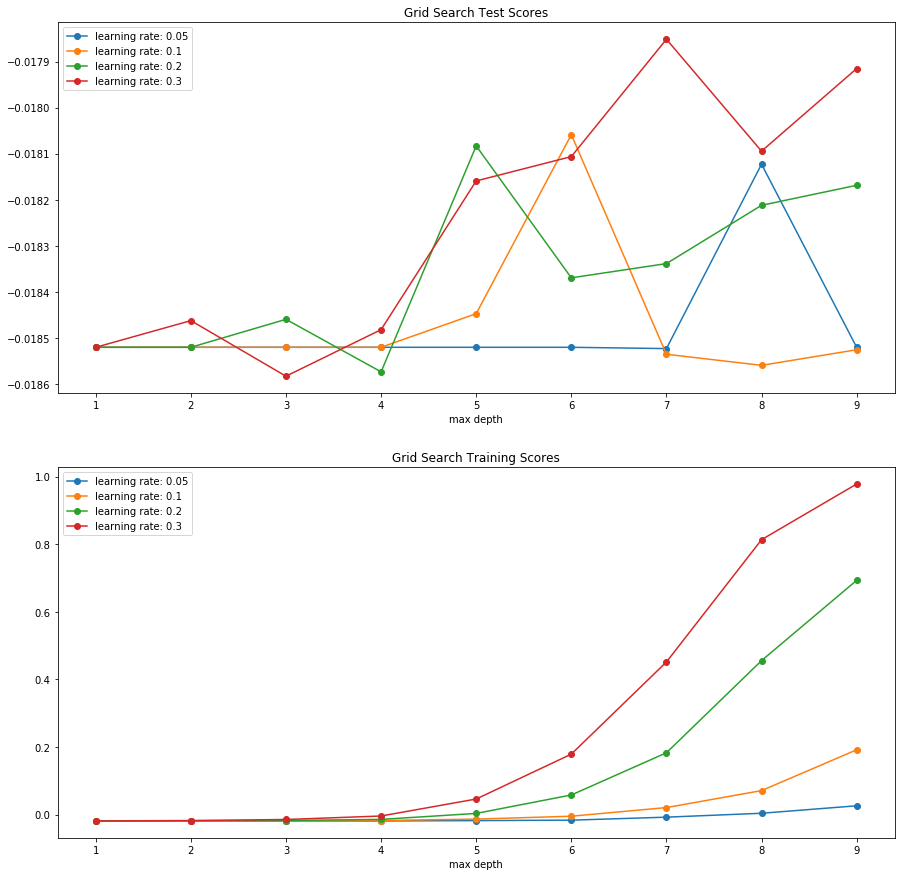

In [50]:
plot_gridsearch_2d(c_validator, params_to_try['learning_rate'], params_to_try['max_depth'], 'learning rate', 'max depth')

In [48]:
c_validator.best_params_

{'learning_rate': 0.3, 'max_depth': 7}

In [57]:
import pickle

In [60]:
pickle.dump(c_validator, open('models/xgb_gridsearch1.pickle', 'wb'))